## Imports

In [1]:
# Imports

import pandas as pd
import numpy as np
import acquire
import prepare
from statistics import mean



import re
import unicodedata
import pandas as pd
import nltk

import prepare
import acquire

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



## Call In DF

In [2]:
df = acquire.get_github_geology_results(cached=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   language  1841 non-null   object        
 1   content   1841 non-null   object        
 2   date      1841 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 57.5+ KB
None


,language,content,date
0,Jupyter Notebook,hylite\nhylite is an open-source python packag...,2020-11-27 17:31:07.762
1,Python,\n\n\n\n\n\nWebviz subsurface\n\n✨👓 Live demo ...,2020-11-27 17:31:08.305
2,R,"Reforester\nReforester, an R program that:\n\n...",2020-11-27 17:31:08.926
3,JavaScript,Swissgeol NGM\nA Geology 3D viewer\nSwissgeol ...,2020-11-27 17:31:09.532
4,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,2020-11-27 17:31:10.206


In [3]:
df.language.value_counts()

Python              463
Jupyter Notebook    460
R                   232
TypeScript          229
JavaScript          229
Batchfile           228
Name: language, dtype: int64

In [4]:
#Clean
df = prepare.prep_data(df, 'content', extra_words=[], exclude_words=[])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   language    1841 non-null   object        
 1   content     1841 non-null   object        
 2   date        1841 non-null   datetime64[ns]
 3   clean       1841 non-null   object        
 4   stemmed     1841 non-null   object        
 5   lemmatized  1841 non-null   object        
 6   words       1841 non-null   object        
 7   doc_length  1841 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 129.4+ KB
None


,language,content,date,clean,stemmed,lemmatized,words,doc_length
0,Jupyter Notebook,hylite\nhylite is an open-source python packag...,2020-11-27 17:31:07.762,hylite hylite opensource python package prepro...,hylit hylit opensourc python packag preprocess...,hylite hylite opensource python package prepro...,"[hylite, hylite, opensource, python, package, ...",300
1,Python,\n\n\n\n\n\nWebviz subsurface\n\n✨👓 Live demo ...,2020-11-27 17:31:08.305,webviz subsurface live demo application introd...,webviz subsurfac live demo applic introduct re...,webviz subsurface live demo application introd...,"[webviz, subsurface, live, demo, application, ...",261
2,R,"Reforester\nReforester, an R program that:\n\n...",2020-11-27 17:31:08.926,reforester reforester r program uses logistic ...,reforest reforest r program use logist birthde...,reforester reforester r program us logistic bi...,"[reforester, reforesterprogram, us, logistic, ...",777
3,JavaScript,Swissgeol NGM\nA Geology 3D viewer\nSwissgeol ...,2020-11-27 17:31:09.532,swissgeol ngm geology 3d viewer swissgeol new ...,swissgeol ngm geolog 3d viewer swissgeol new g...,swissgeol ngm geology 3d viewer swissgeol new ...,"[swissgeol, ngm, geology, 3d, viewer, swissgeo...",127
4,Python,geomodel-2-3dweb\n\nGenerates 3D web versions ...,2020-11-27 17:31:10.206,geomodel23dweb generates 3d web versions geolo...,geomodel23dweb gener 3d web version geolog mod...,geomodel23dweb generates 3d web version geolog...,"[geomodel23dweb, generates, 3d, web, version, ...",173


In [5]:
df.language.value_counts()

Python              463
Jupyter Notebook    460
R                   232
TypeScript          229
JavaScript          229
Batchfile           228
Name: language, dtype: int64

## Ave Length of Readme

In [6]:
python_doc_length = round(mean(df[df.language == 'Python'].doc_length), 2)
jupyter_doc_length = round(mean(df[df.language == 'Jupyter Notebook'].doc_length),2)
r_doc_length = round(mean(df[df.language == 'R'].doc_length),2)
javascript_doc_length = round(mean(df[df.language == 'JavaScript'].doc_length),2)
typescript_doc_length = round(mean(df[df.language == 'TypeScript'].doc_length),2)
batchfile_doc_length = round(mean(df[df.language == 'Batchfile'].doc_length),2)

print(f'The average word length of the python repositories is {python_doc_length}')
print(f'The average word length of the jupyter repositories is {jupyter_doc_length}')
print(f'The average word length of the r repositories is {r_doc_length}')
print(f'The average word length of the javascript repositories is {javascript_doc_length}')
print(f'The average word length of the typescript repositories is {typescript_doc_length}')
print(f'The average word length of the batchfile repositories is {batchfile_doc_length}')

The average word length of the python repositories is 217.1
The average word length of the jupyter repositories is 174.1
The average word length of the r repositories is 777
The average word length of the javascript repositories is 127
The average word length of the typescript repositories is 296
The average word length of the batchfile repositories is 307


## Explore List of Words

In [7]:
# Create list of words
python_words = ' '.join(df[df.language=='Python'].lemmatized)
jupyter_words = ' '.join(df[df.language=='Jupyter Notebook'].lemmatized)
r_words = ' '.join(df[df.language=='R'].lemmatized)
typescript_words = ' '.join(df[df.language=='TypeScript'].lemmatized)
javascript_words = ' '.join(df[df.language=='JavaScript'].lemmatized)
batchfile_words = ' '.join(df[df.language=='Batchfile'].lemmatized)
all_words = ' '.join(df.lemmatized)

# remove spaces
python_words = re.sub(r'\s.\s', '', python_words)
jupyter_words = re.sub(r'\s.\s', '', jupyter_words)
r_words = re.sub(r'\s.\s', '', r_words)
typescript_words = re.sub(r'\s.\s', '', typescript_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
batchfile_words = re.sub(r'\s.\s', '', batchfile_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [8]:
# wordcounts

python_freq = pd.Series(python_words.split()).value_counts()
jupyter_freq = pd.Series(jupyter_words.split()).value_counts()
r_freq = pd.Series(r_words.split()).value_counts()
typescript_freq = pd.Series(typescript_words.split()).value_counts()
javascript_freq = pd.Series(javascript_words.split()).value_counts()
batchfile_freq = pd.Series(batchfile_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

## What repositories detail work in Geology

In [18]:
# No geology keywords in top 20 most frequent words
python_freq.head(20)

file                2776
test                1392
repository          1391
code                1391
see                 1390
documentation       1389
also                1159
install             1159
run                 1159
gocad               1155
webvizsubsurface     928
subsurface           928
container            928
check                928
configuration        928
github               928
pip                  928
registry             928
application          928
webviz               928
dtype: int64

In [19]:
# Several geology keywords in to 20
jupyter_freq.head(20)

hylite           4176
install          2088
data             1392
python           1392
also             1160
import           1160
spectral         1160
gdal             1160
using            1152
please            928
mapping           696
preprocessing     696
wavelength        696
variety           696
github            696
different         696
installation      696
implemented       696
minimum           696
directory         696
dtype: int64

In [20]:
# many geology keywords in top 20
r_freq.head(20)

fossil           4408
run              3016
sampling         3016
simulation       3016
diversity        2320
using            2320
data             2320
rate             2320
time             2088
tree             2088
file             1856
model            1624
true             1624
reconstructed    1624
record           1392
result           1392
number           1160
license          1160
could            1160
method           1160
dtype: int64

In [22]:
# No geology Content
typescript_freq.head(20)

file           2977
model          2748
start          1832
server         1603
see            1145
service        1145
website         916
conversion      916
npm             916
graphic         916
web             916
provides        916
config          687
information     687
nvcl            687
build           687
adding          687
readmemd        687
python          687
borehole        687
dtype: int64

In [24]:
# many geology references
javascript_freq.head(20) 

open         687
use          687
viewer       687
see          687
swisstopo    687
3d           687
limit        458
default      458
cesium       458
version      458
disable      458
parameter    458
display      458
lava         458
inspector    458
url          458
quality      458
swissgeol    458
geology      458
ngm          458
dtype: int64

In [25]:
# All in spannish, not so helpful to me
batchfile_freq.head(20)

de                7752
la                2280
en                1824
curso             1368
el                1368
del               1140
mapas             1140
disponibles        912
web                912
crear              912
por                912
datos              684
partir             684
para               684
utilizacion        684
grillas            684
ejercicios         456
aplicada           456
geoinformatica     456
multitematica      456
dtype: int64

In [26]:
all_freq.head(20)

de            7752
file          7609
model         5296
fossil        4408
run           4404
hylite        4176
data          4173
using         3936
see           3918
install       3705
simulation    3016
sampling      3016
also          3012
python        2773
code          2544
time          2544
diversity     2320
rate          2320
script        2304
start         2293
dtype: int64

***
### Focus on Repositories That have Geology Content
 
 - `No`: Python, Typescrpt, Batchfile   
 
 - `Yes`: Jupyter, R, Javascript   

***

In [29]:
# Dataframe to compare most frequent words

# word_counts = (pd.concat([all_freq, python_freq, jupyter_freq, r_freq, typescript_freq, javascript_freq, batchfile_freq], axis=1, sort=True)
#                .set_axis(['all', 'python', 'jupyter', 'r', 'typescript', 'javascript', 'batchfile'], axis=1, inplace=False)
#                .fillna(0)
#                .apply(lambda s: s.astype(int))
#               )

# word_counts.head(20)

word_counts = (pd.concat([jupyter_freq, r_freq, javascript_freq], axis=1, sort=True)
               .set_axis(['jupyter', 'r', 'javascript'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head(20)

,jupyter,r,javascript
100,0,0,229
10000,0,0,229
20,0,0,229
200,0,0,229
201920,0,232,0
2021,232,0,0
30,0,232,0
30000,0,232,0
3589,0,232,0
3d,232,0,687


In [30]:
# visualize the percentage of the term in jupyter, r, javascript
# (word_counts.assign(p_python = word_counts.python/word_counts['all'], 
#                    p_jupyter = word_counts.jupyter/word_counts['all'],
#                    p_r = word_counts.r/word_counts['all'],
#                    p_typescript = word_counts.typescript/word_counts['all'],
#                    p_javascript = word_counts.javascript/word_counts['all'],
#                    p_batchfile = word_counts.batchfile/word_counts['all'])
#  .sort_values(by='all')[['p_python', 'p_jupyter', 'p_r','p_typescript','p_javascript','p_batchfile']]
#  .tail(20)
#  .sort_values('p_jupyter')
#  .plot.barh(stacked=True, figsize = (20,10))
# )

# plt.title("Proportion of 20 most common keywords in GitHub Geology README Files", fontsize = 20)
# plt.show()
(word_counts.assign(p_jupyter = word_counts.jupyter/word_counts['all'],
                   p_r = word_counts.r/word_counts['all'],
                   p_javascript = word_counts.javascript/word_counts['all'])
 .sort_values(by='all')[['p_jupyter', 'p_r','p_javascript']]
 .tail(20)
 .sort_values('p_jupyter')
 .plot.barh(stacked=True, figsize = (20,10))
)

plt.title("Proportion of 20 most common keywords in GitHub Geology README Files", fontsize = 20)
plt.show()


KeyError: 'all'

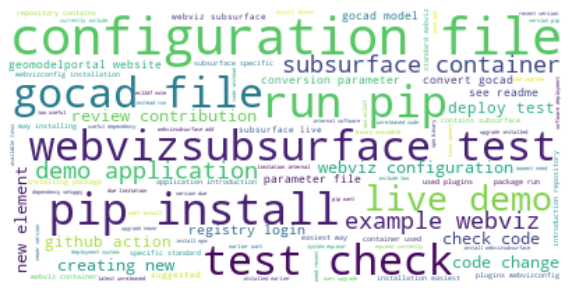

In [11]:
# Wordcloud python
plt.figure(figsize=(10,10))
text = python_words
wc = WordCloud(background_color="white",
               max_words=2000, max_font_size=224,
               random_state=42)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Bigrams and Trigrams

In [12]:
#Create list of bigrams
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().hea

NameError: name 'ham_words' is not defined

In [ ]:
# addd code